# Clustering Music Genres

Burada Spotify'daki popüler şarkıların bir veri kümesi veriliyor, bu veri kümesinde her müziğin tüm ses özellikleriyle birlikte sanatçılar ve müzik adları yer alıyor. Amacımız, müzik türlerini ses özelliklerindeki benzerliklere göre gruplandırmak.

<img src="https://images.inc.com/uploaded_files/image/1920x1080/getty_626660256_2000108620009280158_388846.jpg">

<a href="https://thecleverprogrammer.com/2022/04/05/clustering-music-genres-with-machine-learning/">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Spotify-2000.csv")

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df.shape

(1994, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [6]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [7]:
df["Length (Duration)"].unique()

array(['201', '207', '341', '269', '256', '247', '257', '366', '223',
       '290', '162', '232', '214', '639', '173', '236', '288', '276',
       '352', '296', '218', '176', '197', '261', '270', '298', '259',
       '306', '310', '211', '186', '185', '264', '202', '263', '266',
       '629', '177', '237', '278', '331', '355', '213', '234', '216',
       '275', '467', '243', '219', '305', '215', '144', '195', '240',
       '357', '297', '281', '273', '212', '279', '249', '229', '394',
       '375', '226', '210', '258', '283', '231', '268', '403', '321',
       '217', '308', '206', '208', '242', '326', '199', '225', '193',
       '302', '294', '238', '433', '324', '154', '245', '248', '311',
       '272', '289', '253', '181', '184', '203', '280', '146', '196',
       '204', '602', '353', '189', '423', '233', '135', '141', '241',
       '262', '346', '319', '284', '501', '287', '170', '187', '171',
       '414', '252', '209', '364', '246', '235', '161', '274', '286',
       '172', '404',

In [8]:
df["Length (Duration)"]=df["Length (Duration)"].str.replace(",","")
# Virgülle ayrılan sayıların virgüllerini kaldırdık

In [9]:
df["Length (Duration)"]=df["Length (Duration)"].astype(int)

In [10]:
df["Title"].nunique()

1958

In [11]:
df["Artist"].nunique()

731

In [12]:
df["Top Genre"].nunique()	

149

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
# KAtegori sütunu önemli olacağını düşündüğüm için sayısal değere dönüştürdüm
df['Sayısal kategori'] = le.fit_transform(df['Top Genre'])

In [16]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Sayısal kategori
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,2
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,5
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,8
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,9
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,61


In [17]:
x=df.drop(["Index","Title","Artist","Top Genre"],axis=1)

In [18]:
x.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Sayısal kategori
0,2004,157,30,53,-14,11,68,201,94,3,71,2
1,2000,135,79,50,-11,17,81,207,17,7,39,5
2,2001,168,69,66,-9,7,52,341,2,17,69,8
3,2007,173,96,43,-4,3,37,269,0,4,76,9
4,2002,106,82,58,-5,10,87,256,1,3,59,61


### Modelling

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.4338331578500066
0.1990048617523317
0.20791348381864422
0.19205424947381203
0.189808279950539
0.18226305798842798
0.1831442278436373
0.17172199326992263


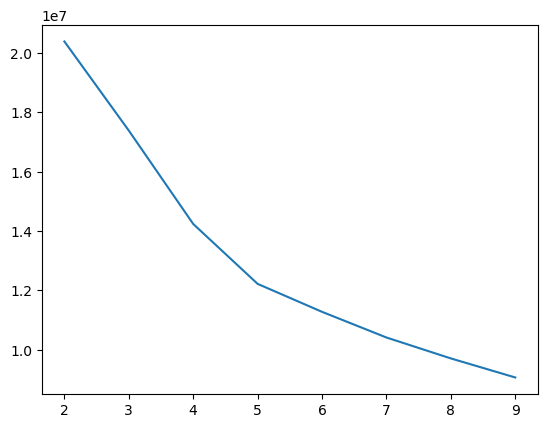

In [24]:
plt.plot(range(2,10),wcss)

In [27]:
#pip install yellowbrick

In [28]:
from yellowbrick.cluster import KElbowVisualizer

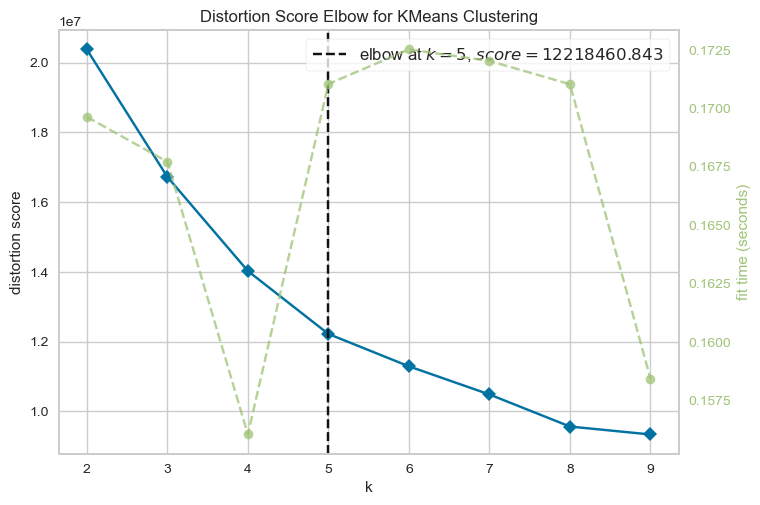

In [30]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
model=KMeans(5,random_state=42)

In [35]:
model.fit(x)

KMeans(n_clusters=5, random_state=42)

In [36]:
tahmin=model.predict(x)

In [37]:
silhouette_score(x,tahmin)

0.19064661910801411

In [38]:
df["Cluster"]=tahmin

In [52]:
df["Cluster"].value_counts()

Cluster
2    718
0    602
4    527
1    139
3      8
Name: count, dtype: int64

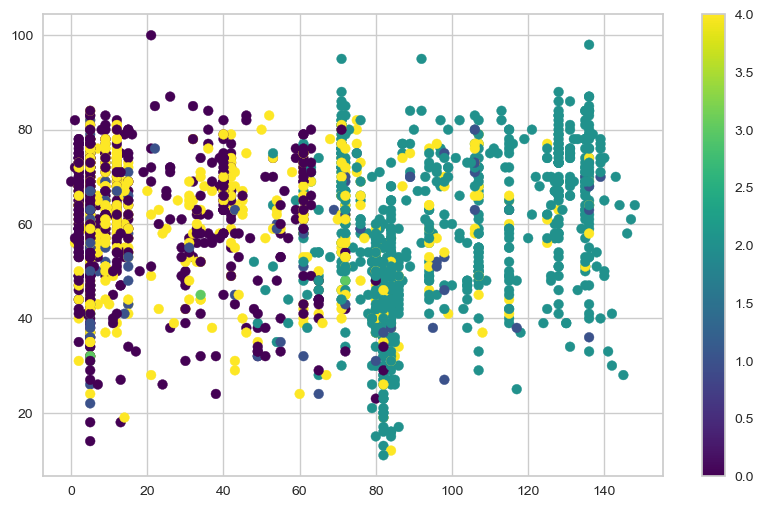

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(x["Sayısal kategori"],x["Popularity"], c=tahmin, cmap='viridis')
plt.colorbar()

In [47]:
data=linkage(x,method="complete")

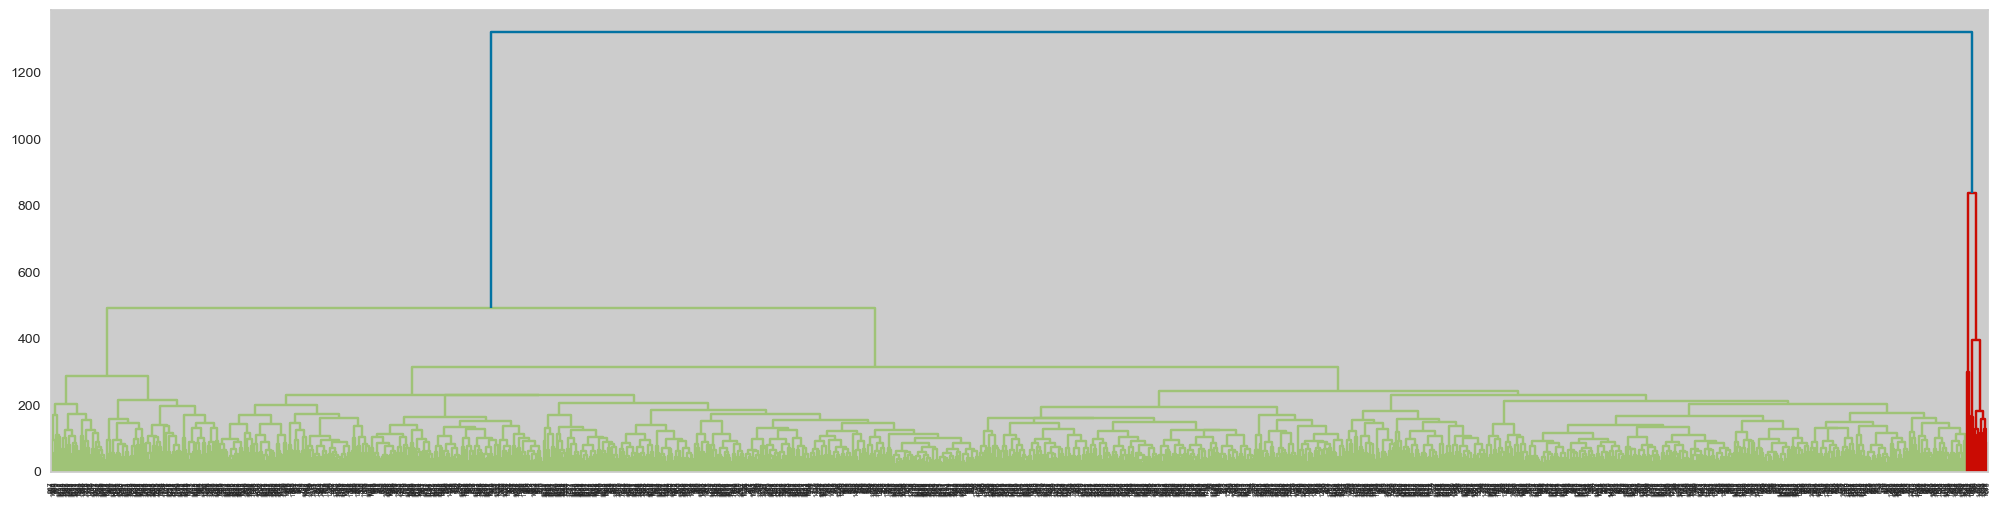

In [48]:
plt.figure(figsize=(25,6))
dendrogram(data);

<Axes: xlabel='Cluster', ylabel='count'>

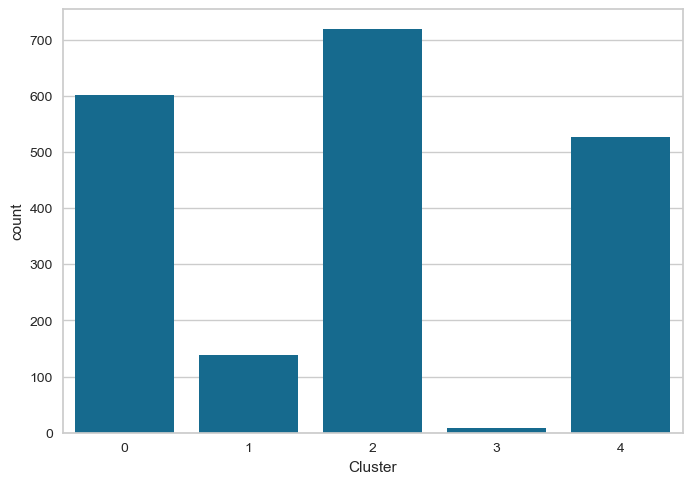

In [55]:
sns.countplot(x=df["Cluster"])

In [56]:
df.sample()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Sayısal kategori,Cluster
736,737,Als Het Avond Is,Suzan & Freek,dutch pop,2018,105,47,72,-7,11,45,206,53,3,65,84,2


In [57]:
birinci_grup = df[df['Cluster'] == 0]['Title']

In [58]:
birinci_grup

0                                                 Sunrise
1                                             Black Night
5                   The Road Ahead (Miles Of The Unknown)
10                                         Love Me Tender
11                                      Seven Nation Army
                              ...                        
1987    My Baby Just Cares for Me - 2013 Remastered Ve...
1989                                     Heartbreak Hotel
1990                                            Hound Dog
1991                                      Johnny B. Goode
1993                                       Blueberry Hill
Name: Title, Length: 602, dtype: object

In [59]:
ikinci_grup = df[df['Cluster'] == 1]['Title']

In [60]:
ikinci_grup

13                          I'm going home
40           Don't Let Me Be Misunderstood
53                      The Unforgiven III
79                       One Day Like This
94                          Limburg - Live
                       ...                
1942                        MacArthur Park
1956    You Can't Always Get What You Want
1973                    Dazed and Confused
1981                      Midnight Rambler
1984    Suite: Judy Blue Eyes - Remastered
Name: Title, Length: 139, dtype: object

In [61]:
ucuncu_grup = df[df['Cluster'] == 2]['Title']

In [64]:
ucuncu_grup

4                                  Waitin' On A Sunny Day
6                                       She Will Be Loved
8                                          Mr. Brightside
12                                          Als Het Golft
14                                 Fluorescent Adolescent
                              ...                        
1920                               Pastorale - Remastered
1926    Window Of My Eyes - From "The American" Soundt...
1932                                                  Lea
1966                                               Marian
1980                                           Summertime
Name: Title, Length: 718, dtype: object

In [62]:
dorduncu_grup = df[df['Cluster'] == 3]['Title']

In [65]:
dorduncu_grup

490                                         Tubular Bells
842                                                Echoes
904     Close to the Edge (i. The Solid Time of Change...
951                              Autobahn - 2009 Remaster
965                 Shine On You Crazy Diamond (Pts. 1-5)
1166                          The Turn of a Friendly Card
1205                                       Telegraph Road
1982                                            Get Ready
Name: Title, dtype: object

In [63]:
besinci_grup = df[df['Cluster'] == 4]['Title']

In [66]:
besinci_grup

2           Clint Eastwood
3            The Pretender
7       Knights of Cydonia
9               Without Me
17               Uninvited
               ...        
1970     Born On The Bayou
1972    The Thrill Is Gone
1974              Overture
1988            Summertime
1992             Take Five
Name: Title, Length: 527, dtype: object

Sonuc olarak dirsek 5 de kırıldığı için 5 küme olusturduk. <br>
2 - 718<br> 0 - 602 <br>4 - 527<br> 1 - 139 <br>3 - 8<br>
küme sayılarımız bu sekilde.   8